# Исследовательский вопрос + данные

Исходный набор данных был взят с ресурса [kaggle](https://www.kaggle.com/c/sberbank-russian-housing-market)

Данные содержат информацию о стоимости недвижимости в России, а также различных факторах, которые характеризуют эту недвижимость.

Всего строк: 996     
Всего столбцов: 9

Описание столбцов:
- id — идентификатор объекта (не участвует в анализе),
- timestamp — временная метка (для анализа времени преобразуем в формат даты и времени, чтобы извлечь год, месяц или тренды),
- price_sq_m — цена за квадратный метр (числовая, непрерывная переменная),
- material_monolit — бинарный признак, указывающий, построено ли здание из монолита (1) или нет (0) (бинарная, категориальная, номинальная переменная),
- green_zone_part — доля зеленой зоны в окружающем районе (числовая, непрерывная переменная),
- industrial_part — доля промышленных зон (числовая, непрерывная переменная),
- ttk_km — расстояние до ТТК (в километрах) (числовая, непрерывная переменная),
- trc_count — количество торгово-развлекательных центров поблизости (числовая, дискретная переменная).

Исходя из представленный данных сформулируем исследовательский вопрос: *Как различные факторы (доля зеленой зоны, промышленных зон, расстояние до ТТК и количество ТРЦ) влияют на цену за квадратный метр?*

In [1]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,id,timestamp,price_sq_m,material_monolit,green_zone_part,industrial_part,ttk_km,trc_count
0,8285,6/1/2013,150980.392157,0,0.083810,0.371149,12.755092,15
1,8394,6/7/2013,200000.000000,0,0.169625,0.019509,1.800854,39
2,8560,6/18/2013,204225.352113,0,0.297166,0.000000,6.828563,24
3,8642,6/24/2013,181818.181818,0,0.069671,0.130618,6.006677,33
4,8814,7/1/2013,196153.846154,0,0.070662,0.035145,8.955545,23


# Обработка пропусков и выбросов

Преобразуем timestamp в формат даты и времени для корректного дальнейшего анализа и удобства изучения года, месяца и дня в случае необходимости

In [2]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [3]:
df.head()

,id,timestamp,price_sq_m,material_monolit,green_zone_part,industrial_part,ttk_km,trc_count
0,8285,2013-06-01,150980.392157,0,0.083810,0.371149,12.755092,15
1,8394,2013-06-07,200000.000000,0,0.169625,0.019509,1.800854,39
2,8560,2013-06-18,204225.352113,0,0.297166,0.000000,6.828563,24
3,8642,2013-06-24,181818.181818,0,0.069671,0.130618,6.006677,33
4,8814,2013-07-01,196153.846154,0,0.070662,0.035145,8.955545,23


Посмотрим на количество пропусков в данных

In [4]:
for i in df.columns:
  print(f'В столбце {i} - {df[i].isna().sum()} пропусков')

В столбце id - 0 пропусков
В столбце timestamp - 0 пропусков
В столбце price_sq_m - 0 пропусков
В столбце material_monolit - 0 пропусков
В столбце green_zone_part - 0 пропусков
В столбце industrial_part - 0 пропусков
В столбце ttk_km - 0 пропусков
В столбце trc_count - 0 пропусков


Наблюдаем, что в исходном наборе данных отсутствуют пропуски    
Если бы пропуски в данных присутствовали, то их дальнейшая обработка зависела бы от их количества. Если пропусков мало (менее 5%), то их можно просто удалить, так как их исключение не внесет большой вклад в изменение основных описательных статистик (`df[df['column_name'].notna()`). Если пропусков много, то будем их заменять на среднее / медиану в заивисмости от их распределения (`df['column_name'].fillna(df['column_name'].mean(), inplace=True)`)

Построим боксплоты для тех признаков, по которым логично искать выбросы, а именно:
- price_sq_m
- green_zone_part
- industrial_part
- ttk_km
- trc_count

<Axes: >

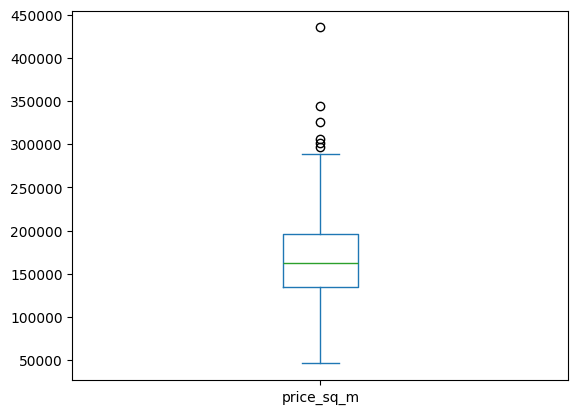

In [5]:
df['price_sq_m'].plot(kind='box')

<Axes: >

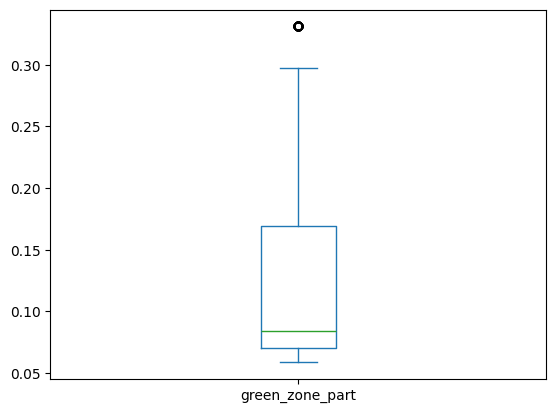

In [6]:
df['green_zone_part'].plot(kind='box')

<Axes: >

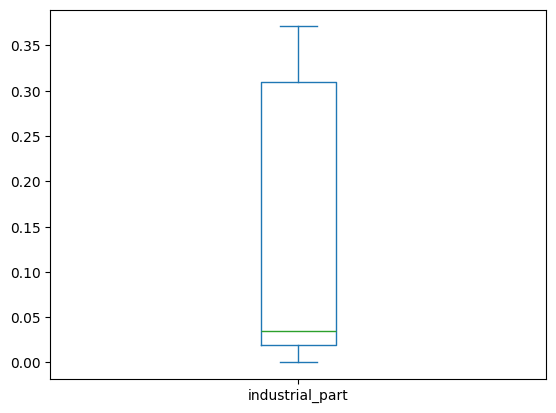

In [7]:
df['industrial_part'].plot(kind='box')

<Axes: >

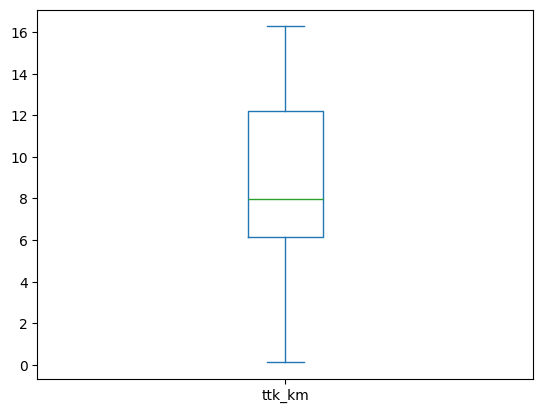

In [8]:
df['ttk_km'].plot(kind='box')

<Axes: >

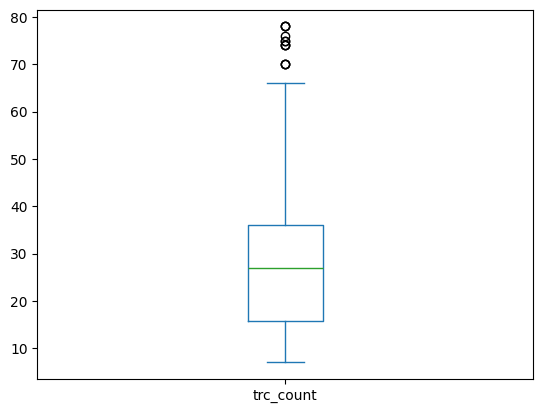

In [9]:
df['trc_count'].plot(kind='box')

Наблюдаем, что выбросы есть в переменных: price_sq_m, green_zone_part, trc_count

Вычислим их количество при помощи IQR

In [10]:
q1 = df['price_sq_m'].quantile(0.25)
q3 = df['price_sq_m'].quantile(0.75)

iqr = q3 - q1

df[(df['price_sq_m'] > q3 + 1.5*iqr) | (df['price_sq_m'] < q1 - 1.5*iqr)].shape[0]

6

In [11]:
q1 = df['green_zone_part'].quantile(0.25)
q3 = df['green_zone_part'].quantile(0.75)

iqr = q3 - q1

df[(df['green_zone_part'] > q3 + 1.5*iqr) | (df['green_zone_part'] < q1 - 1.5*iqr)].shape[0]

78

In [12]:
q1 = df['trc_count'].quantile(0.25)
q3 = df['trc_count'].quantile(0.75)

iqr = q3 - q1

df[(df['trc_count'] > q3 + 1.5*iqr) | (df['trc_count'] < q1 - 1.5*iqr)].shape[0]

12

Удалим все выбросы в данных

In [13]:
q1 = df['price_sq_m'].quantile(0.25)
q3 = df['price_sq_m'].quantile(0.75)

iqr = q3 - q1

df = df[(df['price_sq_m'] <= q3 + 1.5*iqr) & (df['price_sq_m'] >= q1 - 1.5*iqr)]

In [14]:
q1 = df['green_zone_part'].quantile(0.25)
q3 = df['green_zone_part'].quantile(0.75)

iqr = q3 - q1

df = df[(df['green_zone_part'] <= q3 + 1.5*iqr) & (df['green_zone_part'] >= q1 - 1.5*iqr)]

In [15]:
q1 = df['trc_count'].quantile(0.25)
q3 = df['trc_count'].quantile(0.75)

iqr = q3 - q1

df = df[(df['trc_count'] <= q3 + 1.5*iqr) & (df['trc_count'] >= q1 - 1.5*iqr)]

Убедимся, что выбросы пропали

In [16]:
for i in ['price_sq_m', 'green_zone_part', 'trc_count']:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)

  iqr = q3 - q1

  print(f'Столбец: {i}. Пропусков: {df[(df[i] > q3 + 1.5*iqr) | (df[i] < q1 - 1.5*iqr)].shape[0]}')

Столбец: price_sq_m. Пропусков: 0
Столбец: green_zone_part. Пропусков: 0
Столбец: trc_count. Пропусков: 0


# Описательные статистики

Перед рассчетом статистик разделим дату на год, месяц, день для вычисления мод в соответствующих категориях (по месяцу и году)

In [17]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df.head()

,id,timestamp,price_sq_m,material_monolit,green_zone_part,industrial_part,ttk_km,trc_count,year,month,day
0,8285,2013-06-01,150980.392157,0,0.083810,0.371149,12.755092,15,2013,6,1
1,8394,2013-06-07,200000.000000,0,0.169625,0.019509,1.800854,39,2013,6,7
2,8560,2013-06-18,204225.352113,0,0.297166,0.000000,6.828563,24,2013,6,18
3,8642,2013-06-24,181818.181818,0,0.069671,0.130618,6.006677,33,2013,6,24
4,8814,2013-07-01,196153.846154,0,0.070662,0.035145,8.955545,23,2013,7,1


In [18]:
print(f'Среднее по price_sq_m:', df['price_sq_m'].mean())
print(f'Медиана по price_sq_m:', df['price_sq_m'].median())
print(f'Размах по price_sq_m:', df['price_sq_m'].max() - df['price_sq_m'].min())

Среднее по price_sq_m: 161803.23575207475
Медиана по price_sq_m: 160526.315789474
Размах по price_sq_m: 239550.64935064956


Цены за квадратный метр в данных относительно стабильны, так как среднее и медиана близки друг к другу. Размах показывает широкий разброс цен, что может быть связано с различиями в характеристиках объектов (например, местоположение, тип здания).

In [19]:
print(f'Среднее по green_zone_part:', df['green_zone_part'].mean())
print(f'Медиана по green_zone_part:', df['green_zone_part'].median())
print(f'Размах по green_zone_part:', df['green_zone_part'].max() - df['green_zone_part'].min())

Среднее по green_zone_part: 0.11910600385082874
Медиана по green_zone_part: 0.083809588
Размах по green_zone_part: 0.238623288


Распределение доли зеленой зоны, скорее всего, асимметрично, с уклоном в сторону районов с небольшой зеленой зоной, но с отдельными районами с большой долей зеленых территорий. Размах подтверждает разнообразие районов: они варьируются от почти лишенных зелени до достаточно зеленых. Разница между средним и медианой предполагает наличие нескольких "зелёных" районов, которые сильно поднимают среднее значение.

In [20]:
print(f'Среднее по industrial_part:', df['industrial_part'].mean())
print(f'Медиана по industrial_part:', df['industrial_part'].median())
print(f'Размах по industrial_part:', df['industrial_part'].max() - df['industrial_part'].min())

Среднее по industrial_part: 0.16045896894364642
Медиана по industrial_part: 0.130617806
Размах по industrial_part: 0.371148999


Распределение асимметрично, с уклоном в сторону меньших значений (большинство районов имеют относительно небольшую долю промышленности, но есть некоторые районы с высокой долей). Большой размах указывает на значительное разнообразие: есть как районы практически без промышленности, так и районы с очень высокой концентрацией

In [21]:
print(f'Среднее по ttk_km:', df['ttk_km'].mean())
print(f'Медиана по ttk_km:', df['ttk_km'].median())
print(f'Размах по ttk_km:', df['ttk_km'].max() - df['ttk_km'].min())

Среднее по ttk_km: 8.61755450319558
Медиана по ttk_km: 7.913335116
Размах по ttk_km: 16.174755154


Распределение расстояний несимметрично, с уклоном в сторону меньших значений (многие объекты находятся ближе к ТТК). Большой размах подчеркивает разнообразие объектов: включены как центральные, так и периферийные районы. Среднее значение может быть смещено вверх из-за нескольких удаленных объектов, поэтому медиана лучше отражает "типичное" расстояние

In [22]:
df['material_monolit'].mode()

,material_monolit
0,0


In [23]:
df['material_monolit'].value_counts()

,count
material_monolit,
0,851
1,54


Чаще всего встречаются не монолитные дома

In [24]:
print(f'Среднее по trc_count:', df['trc_count'].mean())
print(f'Медиана по trc_count:', df['trc_count'].median())
print(f'Мода по trc_count:', df['trc_count'].mode()[0])

Среднее по trc_count: 25.678453038674032
Медиана по trc_count: 27.0
Мода по trc_count: 15


In [25]:
df['year'].mode()[0]

2014

In [26]:
df['year'].value_counts()

,count
year,
2014,589
2013,165
2015,151


In [27]:
df['month'].mode()[0]

4

In [28]:
df['month'].value_counts()

,count
month,
4,117
12,116
11,85
5,85
2,84
6,83
3,80
10,63
1,55


In [29]:
df['day'].mode()[0]

20

In [30]:
df['day'].value_counts()

,count
day,
20,44
27,38
18,36
11,35
25,34
28,34
23,34
6,34
17,33


# Линейная регрессия

Построим модель линейной регрессии. В качестве целевой переменной будем использовать цену квадратного метра, остальные же параметры будут выступать предикторами

In [115]:
import statsmodels.api as sm

X = sm.add_constant(df[['green_zone_part', 'industrial_part', 'ttk_km', 'trc_count', 'material_monolit']])
Y = df['price_sq_m']
model = sm.OLS(Y, X).fit()

Оценим коэффициент детерминации получившейся модели

In [116]:
model.rsquared

0.5516983313913426

Модель показала, что она способна объяснить 55% данных, это свидетельствует о нормальном качестве модели

оценим показатели MSE и MAE

In [36]:
import numpy as np

y_pred = model.predict(X)
y_true = df['price_sq_m']

mse = np.mean((y_true - y_pred) ** 2)
mae = np.mean(np.abs(y_true - y_pred))

print('MSE:', mse)
print('MAE:', mae)

MSE: 913671861.0499917
MAE: 23012.365881795835


Средняя абсолютная ошибка велика и составляет 23012, что говорит о необходимости улучшения качества модели

Переобучим модель путём добавления других - менее релевантных признаков

In [38]:
df.head()

,id,timestamp,price_sq_m,material_monolit,green_zone_part,industrial_part,ttk_km,trc_count,year,month,day
0,8285,2013-06-01,150980.392157,0,0.083810,0.371149,12.755092,15,2013,6,1
1,8394,2013-06-07,200000.000000,0,0.169625,0.019509,1.800854,39,2013,6,7
2,8560,2013-06-18,204225.352113,0,0.297166,0.000000,6.828563,24,2013,6,18
3,8642,2013-06-24,181818.181818,0,0.069671,0.130618,6.006677,33,2013,6,24
4,8814,2013-07-01,196153.846154,0,0.070662,0.035145,8.955545,23,2013,7,1


In [39]:
X = sm.add_constant(df[['green_zone_part', 'industrial_part', 'ttk_km', 'trc_count', 'material_monolit', 'year', 'month', 'day']])
Y = df['price_sq_m']
model = sm.OLS(Y, X).fit()

In [40]:
y_pred = model.predict(X)
y_true = df['price_sq_m']

mse = np.mean((y_true - y_pred) ** 2)
mae = np.mean(np.abs(y_true - y_pred))

print('MSE:', mse)
print('MAE:', mae)
print('R^2:', model.rsquared)

MSE: 907815653.2427537
MAE: 22972.81596450447
R^2: 0.5545717346815421


Обратим внимание на то, что модель показала схожий коэффициент детерминации, но при этом показатели средней абсолютной ошибки и как следствие среднеквадртичной ошибки уменьшились, что свидетельствует об улучшении качества модели

# Логистическая регрессия

In [93]:
df['price_sq_m'].mean()

161803.23575207475

Разобьем данные на категории по стоимости квадратного метра:
- до 161803 - 0я категория (ниже среднего)
- выше 161803 - 1я категория (выше среднего)

In [94]:
def add_category(x):
  if x < 161803:
    return 0
  else:
    return 1

df['price_cat'] = df['price_sq_m'].apply(add_category)
df['price_cat'].value_counts()

,count
price_cat,
0,464
1,441


Разделим выборку на тестовую и тренировочную

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, confusion_matrix, log_loss, accuracy_score, recall_score, roc_auc_score, roc_curve

X = df[['material_monolit', 'green_zone_part', 'industrial_part', 'ttk_km', 'trc_count']]
y = df['price_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Построим модель линейной регрессии

In [130]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Оценим метрики качества модели

In [131]:
y_pred = model.predict(X_test)

In [132]:
y_pred1 = model.predict_proba(X_test)

In [133]:
model.classes_

array([0, 1])

In [134]:
log_loss(y_test, y_pred1)

0.4975148049024358

Низкое значение logloss говорит о том, что модель хорошо оценивает вероятности и достаточно точна в своих предсказаниях

In [101]:
confusion_matrix(y_test, y_pred)

array([[68, 23],
       [13, 77]])

Модель более склонна к ложным срабатываниям на классе "ниже среднего" для цены за квадратный метр (23 ошибки)

In [102]:
accuracy_score(y_test, y_pred)

0.8011049723756906

Модель правильно классифицировала 80.1% всех объектов, что является хорошим результатом

In [103]:
precision_score(y_test, y_pred)

0.77

Из всех объектов, предсказанных как "выше среднего", 77% действительно являются таковыми

In [89]:
recall_score(y_test, y_pred)

0.8253968253968254

Модель находит 82.5% всех объектов, чья цена за квадратный метр выше среднего

In [92]:
roc_auc_score(y_test, y_pred1[:, 1])

0.8751008878127522

У модели высокая способность разделять по стоимости квадратного метра (выше / ниже среднего) здания на основе вероятностей

Модель демонстрирует хороший баланс между метриками:

- Высокие Accuracy и Recall говорят о том, что модель эффективно распознает оба класса
- Precision немного ниже из-за наличием ложных срабатываний
- ROC AUC подчеркивает, что модель хорошо предсказывает вероятности для классов.

# Базовая визуализация

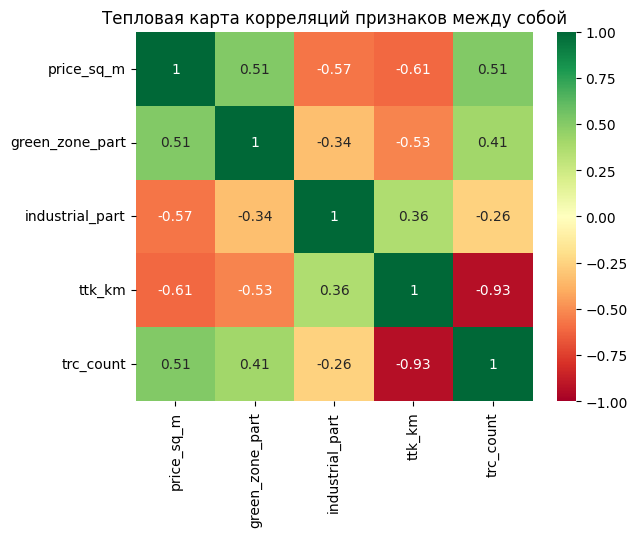

In [118]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.heatmap(
    df[['price_sq_m', 'green_zone_part', 'industrial_part', 'ttk_km', 'trc_count']].corr(),
    annot=True, cmap='RdYlGn', vmin=-1, vmax=1
)
plt.title('Тепловая карта корреляций признаков между собой')
plt.show()

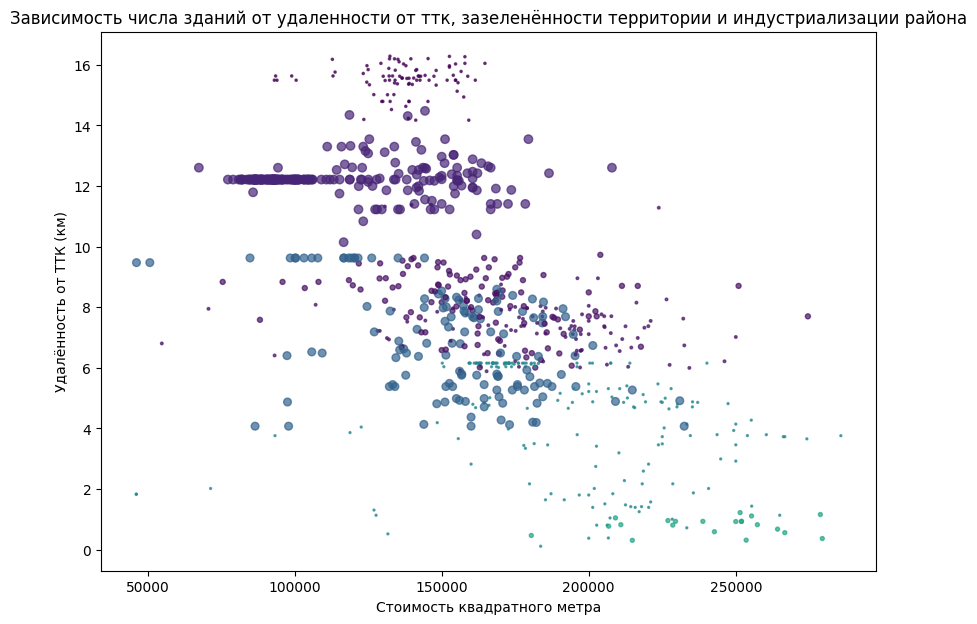

In [127]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(
    df['price_sq_m'], df['ttk_km'],
    c=df['green_zone_part'], s=df['industrial_part']*100,
    alpha=0.7
    )
ax.set_title('Зависимость числа зданий от удаленности от ттк, зазеленённости территории и индустриализации района')
ax.set_xlabel('Стоимость квадратного метра')
ax.set_ylabel('Удалённость от ТТК (км)')
plt.show()

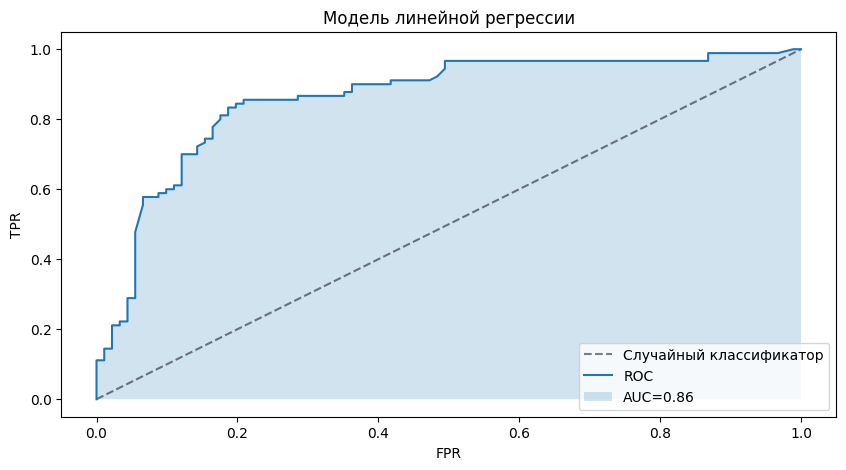

In [137]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.plot([0, 1], [0, 1], 'k--', label='Cлучайный классификатор', alpha = 0.5)
fpr, tpr, thresholds = roc_curve(y_test, y_pred1[:, 1], pos_label=1)
ax.plot(fpr, tpr, label = 'ROC')
ax.fill_between(fpr, 0, tpr, alpha=0.2, label = f'AUC={round(roc_auc_score(y_test, y_pred1[:, 1]), 2)}')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title(f'Модель линейной регрессии')
ax.legend(loc = 4)

plt.show()

# Продвинутая визуализация

In [158]:
mean_price = df.groupby('year')['price_sq_m'].mean()
trace = go.Bar(
    x=mean_price.index, y=mean_price
)
layout = go.Layout(
    title='Распределение средней цены за квадратный метр от года',
    xaxis_title='Год',
    yaxis_title='Средняя цена за квадратный метр'
  )
fig = go.Figure(data=trace, layout=layout)
fig

In [172]:
import plotly.graph_objects as go

trace0 = go.Scatter(
    x=df[df['material_monolit'] == 0]['ttk_km'],
    y=df[df['material_monolit'] == 0]['price_sq_m'],
    mode='markers',
    name='Не монолит'
)
trace1 = go.Scatter(
    x=df[df['material_monolit'] == 1]['ttk_km'],
    y=df[df['material_monolit'] == 1]['price_sq_m'],
    mode='markers',
    name='Монолит'
)
layout = go.Layout(
    title='Распределение цены за квадратный метр от удаленности от ТТК среди монолитных и не монолитных домов',
    xaxis_title='Расстояние от ТТК (км)',
    yaxis_title='Цена за квадратный метр'
    )
fig = go.Figure(data=[trace0, trace1], layout=layout)
fig

In [164]:
import plotly.figure_factory as ff

corr_matrix = df[["price_sq_m", "green_zone_part", "industrial_part", "ttk_km", "trc_count"]].corr()

fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.columns.tolist(),
    colorscale="Viridis",
    showscale=True,
)
fig.show()

In [170]:
import plotly.express as px

fig = px.scatter_matrix(
    df,
    dimensions=["price_sq_m", "green_zone_part", "industrial_part", "ttk_km"],
    color="material_monolit",
    title="Scatter Matrix ключевых признаков",
    labels={"material_monolit": "Тип здания (монолит)"}
  )

fig.show()

In [171]:
fig = px.line(df, x="timestamp", y="price_sq_m",
              title="Изменение стоимости квадратного метра с течением времени",
              labels={"timestamp": "Дата", "price_sq_m": "Стоимость квадратного метра"})
fig.show()